In [3]:
import numpy as np
import rasterio

In [4]:
dem = rasterio.open('./12ke47_1mdem.tif')

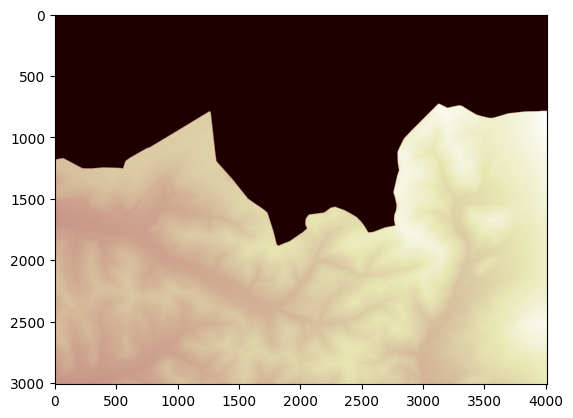

In [9]:
# show dem as image
import matplotlib.pyplot as plt
plt.imshow(dem.read(1), cmap='pink')

In [10]:
def calc_slope(dem:np.ndarray):
    """傾斜率を求める"""
    z2 = dem[1:-1, 0:-2]
    z4 = dem[0:-2, 1:-1]
    z6 = dem[2:, 1:-1]
    z8 = dem[1:-1, 2:]
    p = (z6 - z4) / 2
    q = (z8 - z2) / 2
    p2 = p * p
    q2 = q * q

    slope = np.arctan((p2 + q2) ** 0.5)
    return slope


In [12]:
res = calc_slope(dem.read(1))

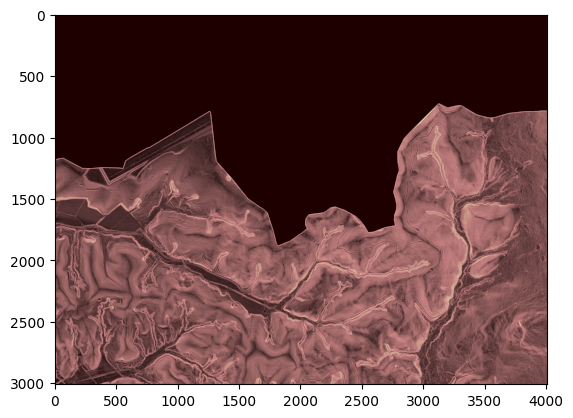

In [13]:
plt.imshow(res, cmap='pink')

In [23]:
dem.shape

(3012, 4012)

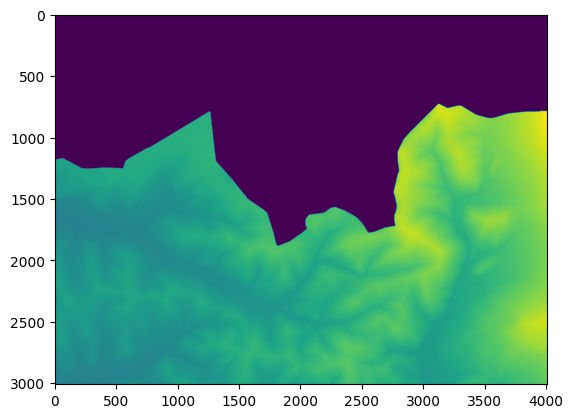

In [18]:
plt.imshow(dem.read(1)[1:-1, 2:])

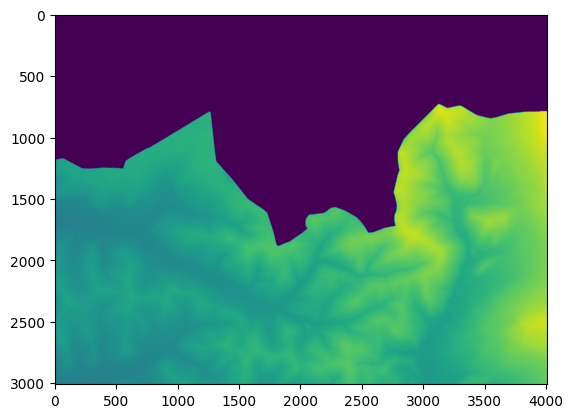

In [19]:
plt.imshow(dem.read(1)[0:-2, 1:-1])

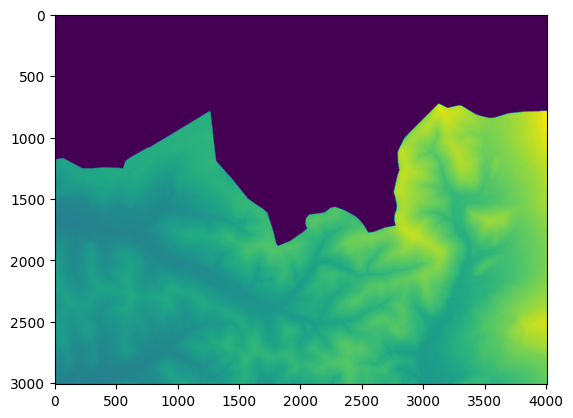

In [20]:
plt.imshow(dem.read(1)[2:, 1:-1])

In [24]:
def calc_curvature(dem: np.ndarray, cell_size: float):
    """曲率を求める
    出力のndarrayのshapeは、(dem.shape[0] - 2, dem.shape[1] - 2)
    """
    z2 = dem[1:-1, 0:-2]
    z4 = dem[0:-2, 1:-1]
    z6 = dem[2:, 1:-1]
    z8 = dem[1:-1, 2:]
    p = (z6 - z4) / (2 * cell_size)
    q = (z8 - z2) / (2 * cell_size)
    p2 = p * p
    q2 = q * q
    spq = (p2 + q2) ** 0.5
    r = (z6 + z4 - 2 * z2) / (4 * cell_size * cell_size)
    t = (z8 + z2 - 2 * z4) / (4 * cell_size * cell_size)
    curvature = (r * q2 - 2 * p * q * r * t + p2 * t) / (p2 + q2) ** 1.5
    return curvature

In [25]:
r = calc_curvature(dem.read(1), 1)

/var/folders/r3/461ds6s95szd1y6sp_rv82km0000gn/T/ipykernel_37423/713481220.py:16: RuntimeWarning: invalid value encountered in divide
  curvature = (r * q2 - 2 * p * q * r * t + p2 * t) / (p2 + q2) ** 1.5


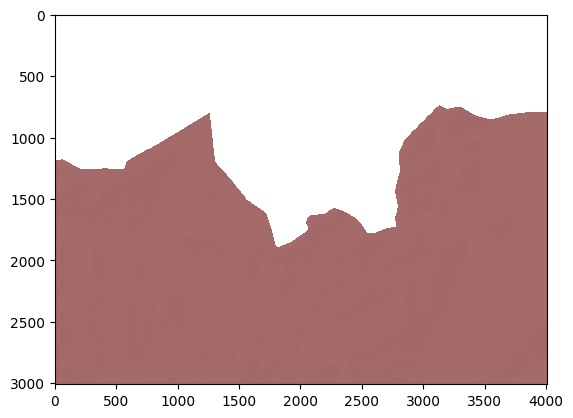

In [26]:
plt.imshow(r, cmap='pink')

In [28]:
r = np.gradient(dem.read(1))

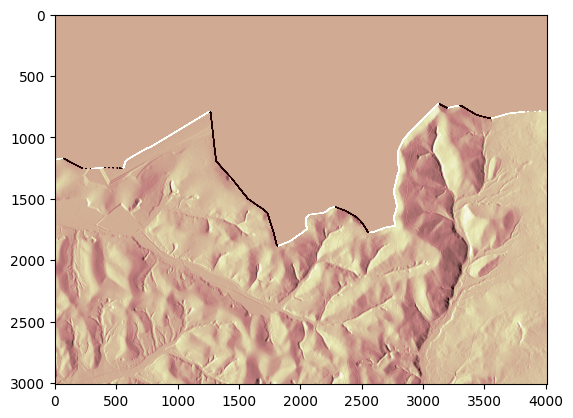

In [34]:
plt.imshow(r[1], cmap='pink', vmin=-1, vmax=1)

In [46]:
def convolve2d(image:np.ndarray):
    filter = np.full((5,5), 1 / 25)
    shape = (image.shape[0] - filter.shape[0] + 1, image.shape[1] - filter.shape[1] + 1) + filter.shape
    strides = image.strides * 2
    strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
    return np.einsum('kl,ijkl->ij', filter, strided_image)

In [44]:
g = convolve2d(dem.read(1))

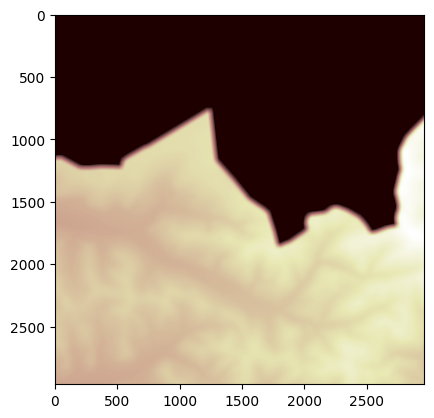

In [45]:
plt.imshow(g, cmap='pink')